In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import pylab as pl
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline
import seaborn as sns
import itertools
import scipy.stats as scs
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score, silhouette_samples
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.cm as cm
from IPython.display import HTML, display
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv("ES.csv")

In [3]:
df.columns = df.columns.str.lstrip()

In [4]:
df.columns = df.columns.str.lower()

In [5]:
df.columns = df.columns.str.replace(" ", "_")

In [6]:
df.head(35)

,activity_type,user_id,rm_id,user_os,user_os_share,viewing_app,viewing_app_version,user_groups,shared_date,shared_time,title_of_content,share_channel,viewed,time_spent_in_seconds,last_activity_date,last_activity_time
0,VIEW,5655305,NaN,MAC_OS_X,MAC_OS_X,SAFARI,NaN,NaN,NaN,NaN,"Doherty, Conan 5.04KW Preliminary Estimate.pdf",NaN,1,180,21-Aug-2017,21:33:08
1,VIEW,5927942,NaN,iOS9_IPAD,iOS9_IPAD,MOBILE_SAFARI,NaN,NaN,NaN,NaN,"Suhre, David 4.48KW Preliminary Estimate.pdf",NaN,1,85,21-Aug-2017,2:16:47
2,VIEW,5927942,NaN,iOS9_IPAD,iOS9_IPAD,MOBILE_SAFARI,NaN,NaN,NaN,NaN,"Suhre, David 4.48KW Preliminary Estimate.pdf",NaN,1,5,20-Aug-2017,21:26:00
3,VIEW,5927942,NaN,iOS9_IPAD,iOS9_IPAD,MOBILE_SAFARI,NaN,NaN,NaN,NaN,Read what our customers have to say,NaN,1,545,20-Aug-2017,7:05:10
4,VIEW,5927942,NaN,iOS9_IPAD,iOS9_IPAD,MOBILE_SAFARI,NaN,NaN,NaN,NaN,"Suhre, David 4.48KW Preliminary Estimate.pdf",NaN,1,5,20-Aug-2017,7:04:50
5,VIEW,5927942,NaN,iOS9_IPAD,iOS9_IPAD,MOBILE_SAFARI,NaN,NaN,NaN,NaN,"Suhre, David 4.48KW Preliminary Estimate.pdf",NaN,1,45,20-Aug-2017,6:51:56
6,VIEW,5927942,NaN,MAC_OS_X_IPHONE,MAC_OS_X_IPHONE,MOBILE_SAFARI,NaN,NaN,NaN,NaN,Read what our customers have to say,NaN,1,185,19-Aug-2017,11:18:43
7,VIEW,5927942,NaN,MAC_OS_X_IPHONE,MAC_OS_X_IPHONE,MOBILE_SAFARI,NaN,NaN,NaN,NaN,About E2 Solar,NaN,1,115,19-Aug-2017,11:16:30
8,VIEW,5927942,NaN,MAC_OS_X_IPHONE,MAC_OS_X_IPHONE,MOBILE_SAFARI,NaN,NaN,NaN,NaN,Upload Electricity Bill,NaN,1,35,19-Aug-2017,11:15:08
9,VIEW,5927942,NaN,MAC_OS_X_IPHONE,MAC_OS_X_IPHONE,MOBILE_SAFARI,NaN,NaN,NaN,NaN,Request your site assessment,NaN,1,5,19-Aug-2017,11:01:34


In [7]:
df["share_channel"].fillna("1", inplace=True)
df["rm_id"].fillna("0", inplace=True)

In [8]:
df.share_channel.unique()

array(['1', 'WEB'], dtype=object)

In [9]:
# rm_id_views ={}
# user_id_views = {}
# k = 0
# for i,j in df.iterrows():
#     if k == 0:
#         temp1 = 0
#         k +=1
#     if j.activity_type == "SHARE":
#         temp1, temp2 = 0, 0
#         temp1 = j["rm_id"]
#         temp2 = j["user_id"]
#     else:
#         if temp1 != 0: 
#             while (j["activity_type"] != "SHARE"):
#                 if temp1 in rm_id_views:
#                     rm_id_views[temp1] +=1
#                 else:
#                     rm_id_views[temp1] =1
#                 if temp2 in user_id_views:
#                     user_id_views[temp2] +=1
#                 else:
#                     user_id_views[temp2] =1
            


In [10]:
#user_id_views, rm_id_views

In [11]:
df.columns


Index([u'activity_type', u'user_id', u'rm_id', u'user_os', u'user_os_share',
       u'viewing_app', u'viewing_app_version', u'user_groups', u'shared_date',
       u'shared_time', u'title_of_content', u'share_channel', u'viewed',
       u'time_spent_in_seconds', u'last_activity_date', u'last_activity_time'],
      dtype='object')

# EDA & Feature Engineering

In [12]:
df.user_os.unique()


array(['MAC_OS_X', 'iOS9_IPAD', 'MAC_OS_X_IPHONE', 'MAC_OS_X_IPAD', nan,
       'WINDOWS_10', 'WINDOWS_7', 'ANDROID_MOBILE', 'ANDROID6_TABLET',
       'ANDROID6', 'ANDROID5', 'ANDROID4_TABLET', 'iOS8_1_IPHONE',
       'WINDOWS_81', 'CHROME_OS', 'ANDROID4', 'iOS8_3_IPHONE',
       'iOS9_IPHONE', 'iOS7_IPHONE'], dtype=object)

In [13]:
df.rename(columns={'user_os': 'viewing_device'}, inplace=True)
df["viewing_device"].replace({"MAC_OS_X" : "Laptop/Desktop", "WEB" : "Laptop/Desktop", "WINDOWS_10" : "Laptop/Desktop", "WINDOWS_7" : "Laptop/Desktop", "WINDOWS_81" : "Laptop/Desktop", "CHROME_OS" : "Laptop/Desktop"}, inplace = True)
df["viewing_device"].replace({"ANDROID_MOBILE" : "Phone", "ANDROID6" : "Phone", "ANDROID4" : "Phone", "ANDROID5" : "Phone","ANDROID7" : "Phone", "MAC_OS_X_IPHONE" : "Phone", "iOS7_IPHONE" : "Phone", "iOS8_1_IPHONE" : "Phone", "iOS8_3_IPHONE" : "Phone", "iOS9_IPHONE" : "Phone"}, inplace=True)
df["viewing_device"].replace({"ANDROID4_TABLET" : "Tablet", "ANDROID6_TABLET" : "Tablet", "iOS9_IPAD" : "Tablet", "MAC_OS_X_IPAD" : "Tablet"}, inplace = True)


In [14]:
df.viewing_app.unique()

array(['SAFARI', 'MOBILE_SAFARI', nan, 'CHROME', 'FIREFOX', 'IE7',
       'CHROME_MOBILE', 'FIREFOX48', 'IE11', 'OPERA', 'EDGE', 'EDGE14',
       'SAFARI9', 'FIREFOX_MOBILE'], dtype=object)

In [15]:
df.rename(columns={'viewing_app': 'browser'}, inplace=True)
df["browser"].replace({"CHROME45" : "CHROME", "CHROME49" : "CHROME", "CHROME41" : "CHROME", "CHROME48" : "CHROME", "CHROME28" : "CHROME", "FIREFOX34" : "FIREFOX", "FIREFOX46" : "FIREFOX", "FIREFOX48" : "FIREFOX", "EDGE12" : "EDGE"}, inplace = True)
df["browser"].replace({"IE11" : "IE", "IE7" : "IE", "EDGE14" : "EDGE", "SAFARI5" : "SAFARI", "SAFARI9" : "SAFARI"}, inplace=True)
df.browser.unique()

array(['SAFARI', 'MOBILE_SAFARI', nan, 'CHROME', 'FIREFOX', 'IE',
       'CHROME_MOBILE', 'OPERA', 'EDGE', 'FIREFOX_MOBILE'], dtype=object)

In [16]:
df["shared_date"] = pd.to_datetime(df["shared_date"], format="%d-%b-%Y")

In [17]:
df["last_activity_date"] = pd.to_datetime(df["last_activity_date"], format="%d-%b-%Y")

In [18]:
df['weekday'] = df['last_activity_date'].dt.dayofweek
df["weekday_name"] = df['last_activity_date'].dt.weekday_name
df["month"] = df['last_activity_date'].dt.month
df["time_of_day"] = pd.to_datetime(df['last_activity_time'], format='%H:%M:%S').dt.hour
df.time_of_day.unique()

array([21,  2,  7,  6, 11, 10,  4,  0,  5, 19,  8,  3, 22,  9,  1, 23, 16,
       12, 17, 15, 14, 13, 20, 18])

In [19]:
# 1: Night(Midnight to 6 am), 2: Morning(6 am to Noon), 3: Afternoon(Noon to 6 pm), 4: Evening(6 pm to Midnight)
df["time_of_day"].replace({0 : 3, 1 : 3, 2 : 3, 3 : 3, 4 : 3, 5 : 3}, inplace = True)
df["time_of_day"].replace({6 : 4, 7 : 4, 8 : 4, 9 : 4, 10 : 4, 11 : 4}, inplace = True)
df["time_of_day"].replace({12 : 1, 13 : 1, 14 : 1, 15 : 1, 16 : 1, 17 : 1}, inplace = True)
df["time_of_day"].replace({18 : 2, 19 : 2, 20 : 2, 21 : 2, 22 : 2, 23 : 2}, inplace = True)
df.time_of_day.unique()

array([2, 3, 4, 1])

In [20]:
df['hour'] = pd.to_datetime(df['last_activity_time'], format='%H:%M:%S').dt.hour

In [21]:
df.viewed.unique()

array([1, 0])

In [22]:
df["time_spent_mins"] = df["time_spent_in_seconds"]/60.

In [23]:
hour_grouped = df.groupby("time_of_day")["time_spent_mins"].sum()

In [24]:
# plot = plt.bar(xrange(0,4),(df.groupby("time_of_day")["time_spent_mins"].sum()))
# plt.xticks(xrange(0,4),["Night", "Morning", "Afternoon", "Evening"])


In [25]:
#sns.distplot(df["time_spent_mins"], color="m")
len(df)

3591

3252

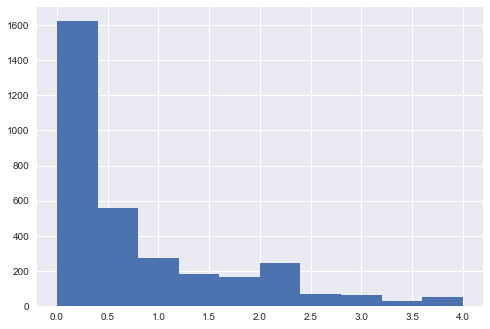

In [26]:
df = df[df["time_spent_mins"] <= 4]
plot = plt.hist(df["time_spent_mins"])
#plt.boxplot(new_df["time_spent_mins"])

len(df) 
# 1917 (22% reduced)
#sns.distplot(new_df["time_spent_mins"], color="g")

In [27]:
temp = 0
for index, row in df.iterrows():
    if row["activity_type"] == "SHARE":
        temp = row["shared_date"]
    else:
        if temp == 0:
            row["shared_date"] = row["last_activity_date"]
        else:
            row["shared_date"] = temp         

In [28]:
df['num_of_day_from_share_view'] = (df["last_activity_date"] - df["shared_date"]).astype(dt.timedelta).map(lambda x: 0 if pd.isnull(x) else x.days)


In [29]:
df = df[df['num_of_day_from_share_view']<2]

In [30]:
len(df)

3220

# SHARE DATA ANALYSIS

In [31]:
share_df = df[df.activity_type == "SHARE"]
share_df.columns

Index([u'activity_type', u'user_id', u'rm_id', u'viewing_device',
       u'user_os_share', u'browser', u'viewing_app_version', u'user_groups',
       u'shared_date', u'shared_time', u'title_of_content', u'share_channel',
       u'viewed', u'time_spent_in_seconds', u'last_activity_date',
       u'last_activity_time', u'weekday', u'weekday_name', u'month',
       u'time_of_day', u'hour', u'time_spent_mins',
       u'num_of_day_from_share_view'],
      dtype='object')

In [32]:
share_df.month.unique()

array([8, 7, 6, 5, 4, 3, 2])

In [33]:
y_time_spent = share_df.groupby("weekday")["time_spent_mins"].sum()

In [34]:
len(share_df.rm_id.unique()), len(share_df)/float(len(share_df.rm_id.unique()))

(6, 33.0)

<Container object of 7 artists>

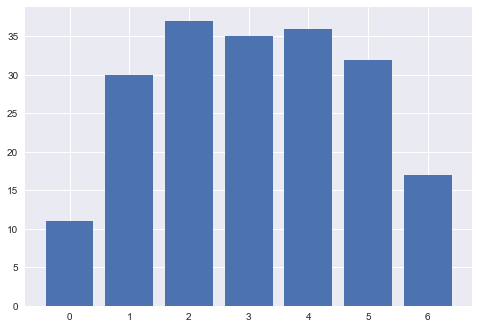

In [35]:
plt.bar(xrange(0,len(share_df.groupby("month")["rm_id"].count())), share_df.groupby("month")["rm_id"].count())


In [36]:
#sns.stripplot(x=share_df["weekday_name"], y=share_df["time_spent_mins"], data=share_df, jitter=True)

In [37]:
len(share_df), len(share_df.user_id.unique()), len(share_df.rm_id.unique())

(198, 145, 6)

In [38]:
from collections import Counter
user_id_list_sh = [j.rm_id for i,j in df.iterrows() if j["activity_type"] == "SHARE"]
num_shares = Counter(user_id_list_sh)
num_shares

Counter({2616837.0: 4,
         2622013.0: 41,
         2636314.0: 5,
         2834196.0: 142,
         4098404.0: 5,
         5239516.0: 1})

In [39]:
# sns.distplot(share_df["num_of_day_from_share_view"], color="m")

(array([ 193.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    5.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

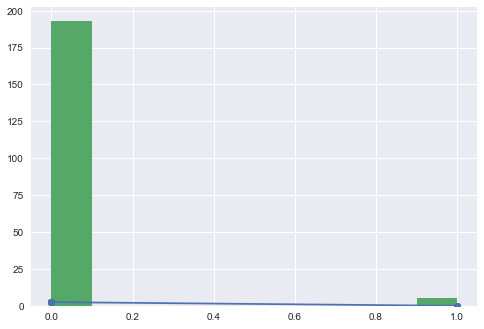

In [40]:
import pylab as pl
h = sorted(share_df["num_of_day_from_share_view"])  #sorted

fit = norm.pdf(h, np.mean(h), np.std(h))  #this is a fitting indeed

pl.plot(h,fit,'-o')

pl.hist(h)

In [41]:
share_df.describe()

,user_id,viewing_app_version,user_groups,viewed,time_spent_in_seconds,weekday,month,time_of_day,hour,time_spent_mins,num_of_day_from_share_view
count,1.980000e+02,0.0,0.0,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000
mean,5.085303e+06,NaN,NaN,0.580808,64.792929,2.555556,5.106061,3.045455,7.818182,1.079882,0.025253
std,7.605339e+05,NaN,NaN,0.494678,76.828589,1.472056,1.702153,0.678124,7.733326,1.280476,0.157289
min,2.622013e+06,NaN,NaN,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000
25%,4.957954e+06,NaN,NaN,0.000000,0.000000,1.000000,4.000000,3.000000,2.000000,0.000000,0.000000
50%,5.272435e+06,NaN,NaN,1.000000,20.000000,2.000000,5.000000,3.000000,5.000000,0.333333,0.000000
75%,5.555166e+06,NaN,NaN,1.000000,125.000000,4.000000,6.000000,3.750000,9.000000,2.083333,0.000000
max,5.933734e+06,NaN,NaN,1.000000,240.000000,5.000000,8.000000,4.000000,23.000000,4.000000,1.000000


<module 'pylab' from '/Users/urmimukherjee/anaconda2/lib/python2.7/site-packages/pylab.pyc'>

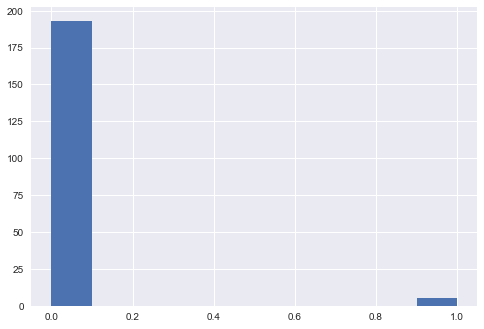

In [42]:
import pylab as pl
days_share_view = share_df[share_df["num_of_day_from_share_view"]<=7]
len(share_df),len(days_share_view)
h = sorted(days_share_view["num_of_day_from_share_view"]) #sorted

# fit = norm.pdf(h, np.mean(h), np.std(h))  #this is a fitting indeed

# pl.plot(h,fit,'-o')

pl.hist(h)
pl

In [43]:
len(share_df),len(days_share_view)

(198, 198)

In [44]:
# uniq_titles = np.sort(share_df.title_of_content.unique())
# uniq_title_num_share = share_df.groupby("title_of_content")["activity_type"].count()
# #uniq_titles 
# uniq_title_num_share

In [45]:
# import pylab as pl
# h = sorted(share_df["time_spent_mins"])  #sorted

# fit = norm.pdf(h, np.mean(h), np.std(h))  #this is a fitting indeed

# pl.plot(h,fit,'-o')

# pl.hist(h,normed=True)


In [46]:
#share_df["weekday"].plot.kde()

In [47]:
# plot = plt.bar(xrange(0,7),(share_df.groupby("weekday")["time_spent_mins"].sum()))
# plt.xticks(xrange(0,7),["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"])
# share_weekday = share_df.groupby("weekday")["time_spent_mins"].sum()

In [48]:
# plot = plt.bar(xrange(0,7),(share_df.groupby("month")["time_spent_mins"].sum()))
# plt.xticks(xrange(0,7),["Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug"])

In [49]:
# import pylab as pl
# new_share = share_df[share_df["time_spent_mins"]<=8]
# h = sorted(new_share["time_spent_mins"])  #sorted

# fit = norm.pdf(h, np.mean(h), np.std(h))  #this is a fitting indeed

# pl.plot(h,fit,'-o')
# pl.axvline(x=np.mean(h)+np.std(h),color='r', linestyle='--')
# pl.axvline(x=np.mean(h)-np.std(h),color='r', linestyle='--')
# pl.hist(h,normed=True)


In [50]:
#h = plt.hist(share_df.time_spent_mins)

In [51]:
#sns.stripplot(x="share_channel", y="time_spent_mins", data=share_df)
df.share_channel.unique()


array(['1', 'WEB'], dtype=object)

([<matplotlib.axis.XTick at 0x1147cc510>],
 <a list of 1 Text xticklabel objects>)

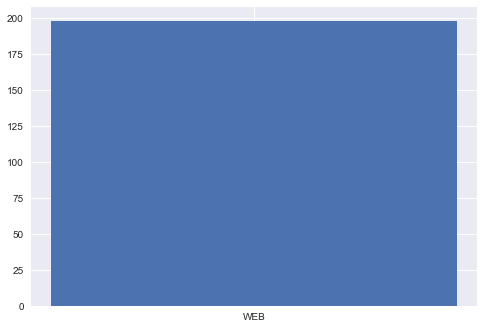

In [52]:
plt.bar(xrange(0,1),(share_df.groupby("share_channel")["time_spent_mins"].count()))
plt.xticks(xrange(0,1),["WEB"])
# plt.xlabel("Share Channel")
# plt.ylabel("Number of Shares")
# plt.title("TW - Num Shares Vs Share Channel")

In [53]:
#sns.stripplot(x="time_of_day", y="time_spent_mins", data=share_df)


# VIEW DATA ANALYSIS

In [54]:
view_df = df[(df.activity_type == "VIEW")]
view_df = view_df.drop(["share_channel", "user_groups", "shared_date", "shared_time", "rm_id", "viewing_app_version"], axis =1)
view_df.describe()

,user_id,viewed,time_spent_in_seconds,weekday,month,time_of_day,hour,time_spent_mins,num_of_day_from_share_view
count,3.022000e+03,3022.0,3022.000000,3022.000000,3022.000000,3022.000000,3022.000000,3022.000000,3022.0
mean,4.127663e+06,1.0,45.145268,2.699206,4.896757,2.989411,8.908339,0.752421,0.0
std,1.199607e+06,0.0,50.202408,1.580205,1.678553,0.792146,7.797368,0.836707,0.0
min,2.616837e+06,1.0,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.0
25%,2.834196e+06,1.0,10.000000,1.000000,3.000000,2.000000,3.000000,0.166667,0.0
50%,4.098404e+06,1.0,22.000000,3.000000,5.000000,3.000000,6.000000,0.366667,0.0
75%,5.239677e+06,1.0,65.000000,4.000000,6.000000,4.000000,16.750000,1.083333,0.0
max,5.933590e+06,1.0,240.000000,6.000000,8.000000,4.000000,23.000000,4.000000,0.0


In [55]:
len(view_df), len(view_df.user_id.unique())

(3022, 183)

In [56]:
view_df.columns

Index([u'activity_type', u'user_id', u'viewing_device', u'user_os_share',
       u'browser', u'title_of_content', u'viewed', u'time_spent_in_seconds',
       u'last_activity_date', u'last_activity_time', u'weekday',
       u'weekday_name', u'month', u'time_of_day', u'hour', u'time_spent_mins',
       u'num_of_day_from_share_view'],
      dtype='object')

In [57]:
views_per_share = len(view_df)/float(len(share_df))
views_per_share

15.262626262626263

In [58]:
len(view_df.title_of_content.unique())


619

(array([ 1522.,   548.,   263.,   155.,   154.,   225.,    56.,    42.,
           25.,    32.]),
 array([ 0. ,  0.4,  0.8,  1.2,  1.6,  2. ,  2.4,  2.8,  3.2,  3.6,  4. ]),
 <a list of 10 Patch objects>)

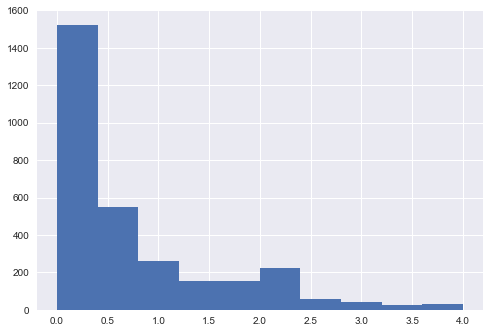

In [59]:
plt.hist(view_df["time_spent_mins"])

# NEW ANALYSIS -- Start

In [60]:
from collections import Counter
user_id_list = [j.user_id for i,j in df.iterrows() if j["activity_type"] == "VIEW"]
num_views = Counter(user_id_list)
best, views = {}, []
#best = sorted(num_views, key=lambda x : num_views[x])
for k,v in num_views.iteritems():
    if v>=2 and v<20:
        best[k] = v
        views.append(v)


In [61]:
len(num_views), len(best), np.array(views).mean(),np.array(views).max(), np.array(views).min()

(183, 140, 8.0571428571428569, 19, 2)

In [62]:
best

{2616837: 3,
 2699084: 5,
 2733491: 10,
 2987296: 4,
 3030935: 15,
 3123168: 5,
 3127683: 9,
 3195226: 7,
 3268105: 14,
 3281432: 2,
 3288051: 3,
 3354679: 8,
 3381734: 7,
 3480466: 10,
 3501150: 3,
 3518338: 5,
 3644223: 2,
 3644339: 2,
 3654922: 8,
 3667401: 5,
 3739182: 9,
 3882655: 4,
 3891465: 8,
 3891692: 8,
 3907834: 5,
 3908136: 2,
 3913947: 16,
 3914397: 4,
 3918477: 2,
 4093679: 5,
 4099467: 3,
 4405949: 19,
 4644420: 2,
 4644519: 15,
 4653948: 14,
 4770307: 16,
 4785163: 12,
 4788974: 4,
 4887623: 5,
 4888220: 12,
 4891210: 16,
 4900809: 8,
 4904527: 4,
 4917483: 11,
 4920033: 8,
 4920262: 15,
 4939033: 7,
 5032254: 7,
 5032376: 16,
 5035844: 9,
 5045231: 5,
 5046561: 6,
 5046673: 8,
 5058757: 9,
 5064124: 12,
 5091928: 16,
 5192894: 15,
 5193046: 2,
 5193141: 4,
 5193210: 9,
 5199673: 10,
 5200144: 10,
 5203832: 8,
 5213666: 15,
 5215921: 16,
 5217482: 9,
 5220678: 8,
 5239003: 6,
 5239535: 14,
 5255454: 11,
 5282278: 5,
 5282523: 2,
 5289812: 5,
 5295095: 7,
 5299002: 10,


(array([ 28.,  25.,  21.,  10.,  19.,   9.,   0.,  11.,  13.,   4.]),
 array([  2. ,   3.7,   5.4,   7.1,   8.8,  10.5,  12.2,  13.9,  15.6,
         17.3,  19. ]),
 <a list of 10 Patch objects>)

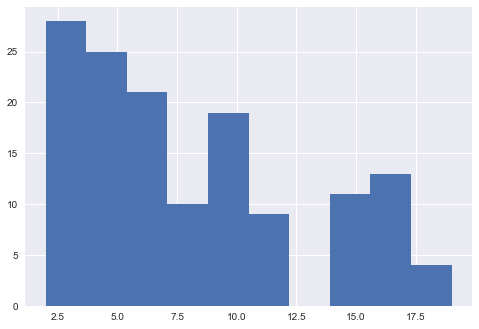

In [63]:
plt.hist([v for v in views if v>1 and v<20])

In [64]:
conv_ids = []
for k,v in num_views.iteritems(): 
    if v>7 and v<15:
        conv_ids.append(k)
conv_ids, len(conv_ids)

([3268105,
  4785163,
  3891465,
  2733491,
  5733956,
  5773156,
  5778045,
  4888220,
  5058757,
  5217482,
  4920033,
  4653948,
  4917483,
  5335291,
  5655305,
  3654922,
  5760269,
  5200144,
  3739182,
  5255454,
  5199673,
  5299002,
  5636419,
  5035844,
  5220678,
  3354679,
  5698896,
  5299557,
  5559148,
  5203832,
  3127683,
  3891692,
  5550987,
  5312909,
  5046673,
  3480466,
  5239535,
  5346885,
  5373347,
  5064124,
  4900809,
  5334004,
  5193210,
  5858299],
 44)

In [65]:
view_df["conv_id"] = view_df["viewed"]
test_df = view_df
conv_df = pd.DataFrame()
for i in xrange(len(conv_ids)):
    temp_df = view_df[view_df["user_id"] == conv_ids[i]]
    conv_df = conv_df.append(temp_df)
    test_df.drop(test_df["user_id"] == conv_ids[i])
    

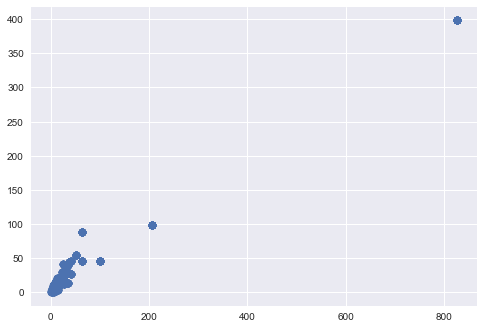

In [91]:
plt.scatter(test_df["num_of_views"],test_df["total_time_mins"])

In [89]:
test_df.columns

Index([u'activity_type', u'browser_CHROME', u'browser_CHROME_MOBILE',
       u'browser_EDGE', u'browser_FIREFOX', u'browser_FIREFOX_MOBILE',
       u'browser_IE', u'browser_MOBILE_SAFARI', u'browser_OPERA',
       u'browser_SAFARI', u'conv_id', u'hour', u'last_activity_date',
       u'last_activity_time', u'month', u'num_of_day_from_share_view',
       u'num_of_views', u'time_of_day_1', u'time_of_day_2', u'time_of_day_3',
       u'time_of_day_4', u'time_spent_in_seconds', u'time_spent_mins',
       u'title_of_content', u'total_time_mins', u'user_id', u'user_os_share',
       u'viewed', u'viewing_device_Laptop/Desktop', u'viewing_device_Phone',
       u'viewing_device_Tablet', u'weekday', u'weekday_name_Friday',
       u'weekday_name_Monday', u'weekday_name_Saturday',
       u'weekday_name_Sunday', u'weekday_name_Thursday',
       u'weekday_name_Tuesday', u'weekday_name_Wednesday'],
      dtype='object')

In [66]:
conv_df.describe()

,user_id,viewed,time_spent_in_seconds,weekday,month,time_of_day,hour,time_spent_mins,num_of_day_from_share_view,conv_id
count,4.490000e+02,449.0,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.0,449.0
mean,4.942770e+06,1.0,59.971047,2.699332,4.991091,2.850780,10.690423,0.999517,0.0,1.0
std,7.946259e+05,0.0,56.103671,1.712878,1.698190,0.936609,7.587285,0.935061,0.0,0.0
min,2.733491e+06,1.0,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.0,1.0
25%,4.888220e+06,1.0,15.000000,1.000000,4.000000,2.000000,5.000000,0.250000,0.0,1.0
50%,5.217482e+06,1.0,40.000000,3.000000,5.000000,3.000000,8.000000,0.666667,0.0,1.0
75%,5.373347e+06,1.0,105.000000,4.000000,7.000000,4.000000,19.000000,1.750000,0.0,1.0
max,5.858299e+06,1.0,240.000000,6.000000,8.000000,4.000000,23.000000,4.000000,0.0,1.0


In [67]:
test_df["conv_id"].replace({1:0}, inplace= True)
for k,v in num_views.iteritems():
    test_df.loc[test_df['user_id'] == k, 'num_of_views'] = v
    test_df.loc[test_df['user_id'] == k, 'total_time_mins'] = test_df[test_df["user_id"] == k]["time_spent_mins"].sum()

test_df.weekday_name.replace({0:"Sunday", 1:"Monday"}, inplace= True)
test_df.head()

,activity_type,user_id,viewing_device,user_os_share,browser,title_of_content,viewed,time_spent_in_seconds,last_activity_date,last_activity_time,weekday,weekday_name,month,time_of_day,hour,time_spent_mins,num_of_day_from_share_view,conv_id,num_of_views,total_time_mins
0,VIEW,5655305,Laptop/Desktop,MAC_OS_X,SAFARI,"Doherty, Conan 5.04KW Preliminary Estimate.pdf",1,180,2017-08-21,21:33:08,0,Monday,8,2,21,3.000000,0,0,10.0,8.00
1,VIEW,5927942,Tablet,iOS9_IPAD,MOBILE_SAFARI,"Suhre, David 4.48KW Preliminary Estimate.pdf",1,85,2017-08-21,2:16:47,0,Monday,8,3,2,1.416667,0,0,16.0,18.75
2,VIEW,5927942,Tablet,iOS9_IPAD,MOBILE_SAFARI,"Suhre, David 4.48KW Preliminary Estimate.pdf",1,5,2017-08-20,21:26:00,6,Sunday,8,2,21,0.083333,0,0,16.0,18.75
4,VIEW,5927942,Tablet,iOS9_IPAD,MOBILE_SAFARI,"Suhre, David 4.48KW Preliminary Estimate.pdf",1,5,2017-08-20,7:04:50,6,Sunday,8,4,7,0.083333,0,0,16.0,18.75
5,VIEW,5927942,Tablet,iOS9_IPAD,MOBILE_SAFARI,"Suhre, David 4.48KW Preliminary Estimate.pdf",1,45,2017-08-20,6:51:56,6,Sunday,8,4,6,0.750000,0,0,16.0,18.75


In [68]:
test_df = view_df.append(conv_df)
test_df["weekday_name"].unique()

array(['Monday', 'Sunday', 'Saturday', 'Friday', 'Thursday', 'Wednesday',
       'Tuesday'], dtype=object)

In [69]:
test_df

,activity_type,browser,conv_id,hour,last_activity_date,last_activity_time,month,num_of_day_from_share_view,num_of_views,time_of_day,time_spent_in_seconds,time_spent_mins,title_of_content,total_time_mins,user_id,user_os_share,viewed,viewing_device,weekday,weekday_name
0,VIEW,SAFARI,0,21,2017-08-21,21:33:08,8,0,10.0,2,180,3.000000,"Doherty, Conan 5.04KW Preliminary Estimate.pdf",8.000000,5655305,MAC_OS_X,1,Laptop/Desktop,0,Monday
1,VIEW,MOBILE_SAFARI,0,2,2017-08-21,2:16:47,8,0,16.0,3,85,1.416667,"Suhre, David 4.48KW Preliminary Estimate.pdf",18.750000,5927942,iOS9_IPAD,1,Tablet,0,Monday
2,VIEW,MOBILE_SAFARI,0,21,2017-08-20,21:26:00,8,0,16.0,2,5,0.083333,"Suhre, David 4.48KW Preliminary Estimate.pdf",18.750000,5927942,iOS9_IPAD,1,Tablet,6,Sunday
4,VIEW,MOBILE_SAFARI,0,7,2017-08-20,7:04:50,8,0,16.0,4,5,0.083333,"Suhre, David 4.48KW Preliminary Estimate.pdf",18.750000,5927942,iOS9_IPAD,1,Tablet,6,Sunday
5,VIEW,MOBILE_SAFARI,0,6,2017-08-20,6:51:56,8,0,16.0,4,45,0.750000,"Suhre, David 4.48KW Preliminary Estimate.pdf",18.750000,5927942,iOS9_IPAD,1,Tablet,6,Sunday
6,VIEW,MOBILE_SAFARI,0,11,2017-08-19,11:18:43,8,0,16.0,4,185,3.083333,Read what our customers have to say,18.750000,5927942,MAC_OS_X_IPHONE,1,Phone,5,Saturday
7,VIEW,MOBILE_SAFARI,0,11,2017-08-19,11:16:30,8,0,16.0,4,115,1.916667,About E2 Solar,18.750000,5927942,MAC_OS_X_IPHONE,1,Phone,5,Saturday
8,VIEW,MOBILE_SAFARI,0,11,2017-08-19,11:15:08,8,0,16.0,4,35,0.583333,Upload Electricity Bill,18.750000,5927942,MAC_OS_X_IPHONE,1,Phone,5,Saturday
9,VIEW,MOBILE_SAFARI,0,11,2017-08-19,11:01:34,8,0,16.0,4,5,0.083333,Request your site assessment,18.750000,5927942,MAC_OS_X_IPHONE,1,Phone,5,Saturday
12,VIEW,MOBILE_SAFARI,0,10,2017-08-19,10:46:28,8,0,16.0,4,45,0.750000,"Suhre, David 4.48KW Preliminary Estimate.pdf",18.750000,5927942,MAC_OS_X_IPHONE,1,Phone,5,Saturday


In [70]:
dummies = pd.get_dummies(test_df, columns=["viewing_device", "weekday_name", "time_of_day", "browser"])

In [71]:
test_df = pd.concat([test_df, dummies])
test_df = test_df.drop(["viewing_device", "weekday_name", "time_of_day", "browser"], axis=1)
test_df.columns

Index([u'activity_type', u'browser_CHROME', u'browser_CHROME_MOBILE',
       u'browser_EDGE', u'browser_FIREFOX', u'browser_FIREFOX_MOBILE',
       u'browser_IE', u'browser_MOBILE_SAFARI', u'browser_OPERA',
       u'browser_SAFARI', u'conv_id', u'hour', u'last_activity_date',
       u'last_activity_time', u'month', u'num_of_day_from_share_view',
       u'num_of_views', u'time_of_day_1', u'time_of_day_2', u'time_of_day_3',
       u'time_of_day_4', u'time_spent_in_seconds', u'time_spent_mins',
       u'title_of_content', u'total_time_mins', u'user_id', u'user_os_share',
       u'viewed', u'viewing_device_Laptop/Desktop', u'viewing_device_Phone',
       u'viewing_device_Tablet', u'weekday', u'weekday_name_Friday',
       u'weekday_name_Monday', u'weekday_name_Saturday',
       u'weekday_name_Sunday', u'weekday_name_Thursday',
       u'weekday_name_Tuesday', u'weekday_name_Wednesday'],
      dtype='object')

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [73]:
test_df.dropna(how= "any", inplace= True)
len(test_df)
x = test_df.as_matrix(columns= [u'time_of_day_1', u'time_of_day_2', u'time_of_day_3', u'time_of_day_4',u'viewing_device_Laptop/Desktop',
       u'viewing_device_Phone', u'viewing_device_Tablet',
        u'weekday_name_Friday', u'weekday_name_Monday',
       u'weekday_name_Saturday', u'weekday_name_Sunday',
       u'weekday_name_Thursday', u'weekday_name_Tuesday',
       u'weekday_name_Wednesday', 'num_of_views', u'browser_CHROME', u'browser_CHROME_MOBILE',
       u'browser_EDGE', u'browser_FIREFOX', u'browser_FIREFOX_MOBILE',
       u'browser_IE', u'browser_MOBILE_SAFARI', u'browser_OPERA',
       u'browser_SAFARI'])
y = test_df.as_matrix(columns= ["time_spent_mins"])

In [74]:
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [100]:
Model = LinearRegression()
Model.fit(x_train, y_train)
Model.predict(x_test)
coeffs = Model.coef_
coeffs, Model.score(x_test,y_test)

(array([[  2.16099219e-01,  -9.72230919e-02,  -1.44434855e-01,
           2.55587279e-02,  -5.64838478e-02,  -3.12725434e-01,
          -2.40756986e-02,  -5.22838341e-02,   7.40850224e-02,
           2.65102106e-02,  -1.03267266e-01,   3.32938038e-02,
           7.77173393e-03,   1.38903292e-02,  -4.27288515e-04,
           8.30152994e-02,   3.47469901e-01,   2.83633845e-01,
           1.76806349e-01,  -5.70572394e-01,   2.77194851e-02,
          -9.02262832e-02,  -5.02746853e-01,  -1.48384331e-01]]),
 0.049069101912435631)

In [117]:
from itertools import izip
feat_list =np.array( [u'time_of_day_1', u'time_of_day_2', u'time_of_day_3', u'time_of_day_4',u'viewing_device_Laptop/Desktop',
       u'viewing_device_Phone', u'viewing_device_Tablet',
        u'weekday_name_Friday', u'weekday_name_Monday',
       u'weekday_name_Saturday', u'weekday_name_Sunday',
       u'weekday_name_Thursday', u'weekday_name_Tuesday',
       u'weekday_name_Wednesday', 'num_of_views', u'browser_CHROME', u'browser_CHROME_MOBILE',
       u'browser_EDGE', u'browser_FIREFOX', u'browser_FIREFOX_MOBILE',
       u'browser_IE', u'browser_MOBILE_SAFARI', u'browser_OPERA',
       u'browser_SAFARI'])
feat_coeff = [(a,b) for a,b in zip(feat_list, coeffs)]
coeffs.shape
feat_list.reshape(1,24)

array([[u'time_of_day_1', u'time_of_day_2', u'time_of_day_3',
        u'time_of_day_4', u'viewing_device_Laptop/Desktop',
        u'viewing_device_Phone', u'viewing_device_Tablet',
        u'weekday_name_Friday', u'weekday_name_Monday',
        u'weekday_name_Saturday', u'weekday_name_Sunday',
        u'weekday_name_Thursday', u'weekday_name_Tuesday',
        u'weekday_name_Wednesday', u'num_of_views', u'browser_CHROME',
        u'browser_CHROME_MOBILE', u'browser_EDGE', u'browser_FIREFOX',
        u'browser_FIREFOX_MOBILE', u'browser_IE', u'browser_MOBILE_SAFARI',
        u'browser_OPERA', u'browser_SAFARI']],
      dtype='<U29')

In [119]:
feat_coeff = [(a,b) for a,b in zip(feat_list, coeffs)]
feat_coeff

[(u'time_of_day_1',
  array([  2.16099219e-01,  -9.72230919e-02,  -1.44434855e-01,
           2.55587279e-02,  -5.64838478e-02,  -3.12725434e-01,
          -2.40756986e-02,  -5.22838341e-02,   7.40850224e-02,
           2.65102106e-02,  -1.03267266e-01,   3.32938038e-02,
           7.77173393e-03,   1.38903292e-02,  -4.27288515e-04,
           8.30152994e-02,   3.47469901e-01,   2.83633845e-01,
           1.76806349e-01,  -5.70572394e-01,   2.77194851e-02,
          -9.02262832e-02,  -5.02746853e-01,  -1.48384331e-01]))]

In [102]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=2, random_state=0)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)

/Users/urmimukherjee/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


In [97]:
rf.score(x_test, y_test)

0.06344233567683899

In [88]:
rf.feature_importances_

array([ 0.        ,  0.        ,  0.01084811,  0.        ,  0.00778895,
        0.03461424,  0.        ,  0.00757674,  0.        ,  0.        ,
        0.        ,  0.00519698,  0.        ,  0.00437202,  0.79488814,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.12689189,  0.        ,  0.00782293])

In [77]:
test_df.dropna(how= "any", inplace= True)
len(test_df)
x1 = test_df.as_matrix(columns= [u'time_of_day_1', u'time_of_day_2', u'time_of_day_3', u'time_of_day_4',u'viewing_device_Laptop/Desktop',
       u'viewing_device_Phone', u'viewing_device_Tablet',
        u'weekday_name_Friday', u'weekday_name_Monday',
       u'weekday_name_Saturday', u'weekday_name_Sunday',
       u'weekday_name_Thursday', u'weekday_name_Tuesday',
       u'weekday_name_Wednesday', 'num_of_views', u'browser_CHROME', u'browser_CHROME_MOBILE',
       u'browser_EDGE', u'browser_FIREFOX', u'browser_FIREFOX_MOBILE',
       u'browser_IE', u'browser_MOBILE_SAFARI', u'browser_OPERA',
       u'browser_SAFARI', "time_spent_mins"])
y1 = test_df.as_matrix(columns= [u'conv_id'])

In [149]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1)

In [151]:
Model1 = LogisticRegression()
Model1.fit(x1_train, y1_train)
Model1.predict(x1_test)
Model1.score(x1_test,y1_test), Model1.coef_

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

In [125]:
conv_df.title_of_content.unique()

array(['SolarWorld Quality', 'Business Investment Tax Credit',
       'Renewable Energy Development Grant', 'BlueSky Renewable Energy',
       'Energy Trust funding status for Pacific Power customers',
       'Form 520SF', 'Construction Requirements', 'Solar Analysis Report',
       'Performance Modeling', 'Audi/Porsche Wall Layouts',
       'Audi Solar Layout', '21.6kW Financial Summary',
       'Audi 36kW Estimate UPGRADED.pdf', 'Executive Summary',
       'Upload Utility Bill', 'Location Verification',
       'Read what our customers have to say', 'Your solar interest - form',
       'Own vs Lease - Homeowners Guide',
       'Maintenance for residential solar', 'Is my home good for solar?',
       'Hoyt, David Prelim Roof Layout.png', 'Why E2 Solar',
       'Why install solar', 'What you can expect',
       'Oregon renewable energy tax credit',
       'Goodman, Mark 4.48KW Preliminary Bid Proposal.pdf',
       'Pacific Power Net Metering',
       'Goodman, Mark Prelim Roof Layout.pn

In [126]:
len(conv_df)

449

In [ ]:
plt.bar(xrange(0,len(conv_df.groupby("browser")["time_spent_mins"].count())), conv_df.groupby("browser")["time_spent_mins"].sum())
plt.xticks(xrange(0,9),['CHR',"M-CH",'EDGE', "FF", 'M-FF', 'IE', 'M-SAF', "OP",'SAF'])

In [ ]:
plt.bar(xrange(0,7), conv_df.groupby("weekday")["time_spent_mins"].count())
plt.xticks(xrange(0,7),["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"])

In [ ]:
plt.bar(xrange(0,4), conv_df.groupby("time_of_day")["time_spent_mins"].sum())
plt.xticks(xrange(0,4),["Morning", "Afternoon", "Evening", "Night"])

In [ ]:
plt.bar(xrange(0,3), conv_df.groupby("viewing_device")["time_spent_mins"].count())
plt.xticks(xrange(0,3),["Laptop/Desktop", "Phone", "Tablet"])

In [ ]:
plt.bar(xrange(0,7), conv_df.groupby("month")["time_spent_mins"].count())
plt.xticks(xrange(0,7),["Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug"])

In [ ]:
#### import pylab as pl
new_view = view_df[view_df["time_spent_mins"] <= 6]
len(new_view) #(20 mins, 1874/2085, 10% reduced) (12 mins, 1746/2085, 16% reduced)(6 mins, 1607/2085, 23% reduced)
# (4 mins, 1513/2085, 28% reduced)

h = sorted(new_view["time_spent_mins"])  #sorted

fit = norm.pdf(h, np.mean(h), np.std(h))  #this is a fitting indeed

pl.plot(h,fit,'-o')

pl.hist(h, normed= True)

pl.axvline(x = np.mean(h), linestyle='--')
pl.axvline(x = np.mean(h) + np.std(h), linestyle='--')
pl.axvline(x = np.mean(h) + 2*np.std(h), linestyle='--')


In [ ]:
new_view.describe()

In [ ]:
plt.hist(new_view["time_spent_mins"])

In [ ]:
sorted(view_df.browser.unique())

In [ ]:
plt.bar(xrange(0,len(view_df.groupby("browser")["time_spent_mins"].sum())), view_df.groupby("browser")["time_spent_mins"].sum())
plt.xticks(xrange(0,9),['CHR',"M-CH",'EDGE', "FF", 'M-FF', 'IE', 'M-SAF', "OP",'SAF'])
# plt.xlabel("Viewing Application")
# plt.ylabel("Total View Time in Minutes")
# plt.title("Time Spent Vs View App")

In [ ]:
plt.bar(xrange(0,len(view_df.groupby("browser")["time_spent_mins"].sum())), new_view.groupby("browser")["time_spent_mins"].sum())
plt.xticks(xrange(0,9),['CHR',"M-CH",'EDGE', "FF", 'M-FF', 'IE', 'M-SAF', "OP",'SAF'])

In [ ]:
plt.bar(xrange(0,4), view_df.groupby("time_of_day")["time_spent_mins"].sum())
plt.xticks(xrange(0,4),["Night", "Morning", "Afternoon", "Evening"])
# plt.xlabel("Time of Day")
# plt.ylabel("Total View Time in Minutes")
# plt.title("TW - Time Spent Vs Time of Day")

In [ ]:
plt.bar(xrange(0,4), new_view.groupby("time_of_day")["time_spent_mins"].sum())
plt.xticks(xrange(0,4),["Night", "Morning", "Afternoon", "Evening"])

In [ ]:
def get_view_time_per_user(unique_users, view_df):
    for user in unique_users:
        temp_time = view_df["user_id"]

In [ ]:
plt.bar(xrange(0,7), view_df.groupby("weekday")["time_spent_mins"].count())
plt.xticks(xrange(0,7),["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"])
#plt.xlabel("Day of Week")
#plt.ylabel("Total View Time in Minutes")
#plt.title("TW - Time Spent Vs Day of Week")

In [ ]:
plt.bar(xrange(0,7), new_view.groupby("weekday")["time_spent_mins"].count())
plt.xticks(xrange(0,7),["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"])

In [ ]:
# Get the time spent on different apps
# def get_time_spent(view_df):
#     time_spent_secs = view_df["time_spent_in_seconds"].sum()
#     view_apps = view_df["view_app_group"].unique()

#     time_spent_dict = {}
#     for v in view_apps:
#         temp_time = view_df[view_df.view_app_group == v]["time_spent_in_seconds"].sum()
#         time_spent_dict[v] = [temp_time, float(temp_time)*100/time_spent_secs]
#     return time_spent_dict

# get_time_spent(view_df)

In [ ]:
plt.bar(xrange(0,3), view_df.groupby("viewing_device")["time_spent_mins"].sum())
plt.xticks(xrange(0,3),["Laptop/Desktop", "Phone", "Tablet"])

In [ ]:
plt.bar(xrange(0,3), new_view.groupby("viewing_device")["time_spent_mins"].sum())
plt.xticks(xrange(0,3),["Laptop/Desktop", "Phone", "Tablet"])

In [ ]:
plt.bar(xrange(0,3), new_view.groupby("viewing_device")["time_spent_mins"].count())
plt.xticks(xrange(0,3),["Laptop/Desktop", "Phone", "Tablet"])

In [ ]:
#sns.stripplot(x="view_app_group", y="time_spent_mins", data=view_df)
#plt.bar(xrange(0,8), view_df.groupby("view_app_group")["time_spent_mins"].sum())

In [ ]:
#sns.boxplot(x="view_app_group", y="time_spent_mins", data=view_df, hue = "view_app_group")


In [ ]:
#sns.barplot(x="view_app_group", y="time_spent_mins", data=view_df, hue = "view_app_group")


In [ ]:
#sns.countplot(x="view_app_group", data=view_df, hue = "view_app_group")


In [ ]:
#plt.bar(xrange(0,9),view_df.groupby("view_app_group")["time_spent_mins"].sum())

In [ ]:
#sns.stripplot(x=view_df["view_app_group"], y=view_df["time_spent_mins"], data=view_df, jitter=True)


In [ ]:
#sns.stripplot(x=view_df["weekday"], y=view_df["time_spent_mins"], data=view_df, jitter=True)



In [ ]:
plt.bar(xrange(0,7), view_df.groupby("month")["time_spent_mins"].sum())
plt.xticks(xrange(0,7),["Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug"])

In [ ]:
plt.bar(xrange(0,7), new_view.groupby("month")["time_spent_mins"].sum())
plt.xticks(xrange(0,7),["Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug"])

In [ ]:
plt.bar(xrange(0,7), view_df.groupby("month")["time_spent_mins"].count())
plt.xticks(xrange(0,7),["Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug"])

In [ ]:
# clusterer = KMeans(n_clusters=7, random_state=10)
# clusterer.fit(X)

